In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model,feature_selection,cross_validation
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [19]:
#Loading the data
df = pd.read_csv("College.csv")

In [20]:
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


### Data set Description
A data frame with 777 observations on the following 18 variables.

**Variable** | **__ Description__** |** Type**
---|---|---
Private |A factor with levels No and Yes indicating private or public|Boolean
Apps |Number of applications received |Integer
Accept|Number of applications accepted|Integer
Enroll |Number of new students enrolled|Integer
Top10perc|Pct. new students from top 10% of H.S. class|Integer
Top25perc Pct|new students from top 25% of H.S. class|Integer
F.Undergrad |Number of fulltime undergraduates |Integer
P.Undergrad |Number of parttime undergraduates |Integer
Outstate |Out-of-state tuition |Integer
Room.Board |Room and board costs |Integer
Books |Estimated book costs|Integer
Personal |Estimated personal spending|Integer
PhD |Pct. of faculty with Ph.D.’s|Integer
Terminal|Pct. of faculty with terminal degree|Integer
S.F.Ratio |Student/faculty ratio |Integer
perc.alumni |Pct. alumni who donate |Integer
Expend |Instructional expenditure per student|Integer
Grad.Rate |Graduation rate|Integer


- p(number of features = 18)
- n = ( number of record =777)
- y = University Apps(Number of applications received)

In [21]:
df.columns

Index([u'Unnamed: 0', u'Private', u'Apps', u'Accept', u'Enroll', u'Top10perc',
       u'Top25perc', u'F.Undergrad', u'P.Undergrad', u'Outstate',
       u'Room.Board', u'Books', u'Personal', u'PhD', u'Terminal', u'S.F.Ratio',
       u'perc.alumni', u'Expend', u'Grad.Rate'],
      dtype='object')

In [22]:
#Separting the predictors and the response
X = df.drop(['Unnamed: 0','Apps'],axis=1)
y = df.Apps

In [23]:
X.head()

,Private,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [25]:
#Private feature as strind type data that has to be converted to float
X.loc[(X.Private=='Yes'),'Private']=1
X.loc[(X.Private=='No'),'Private']=0



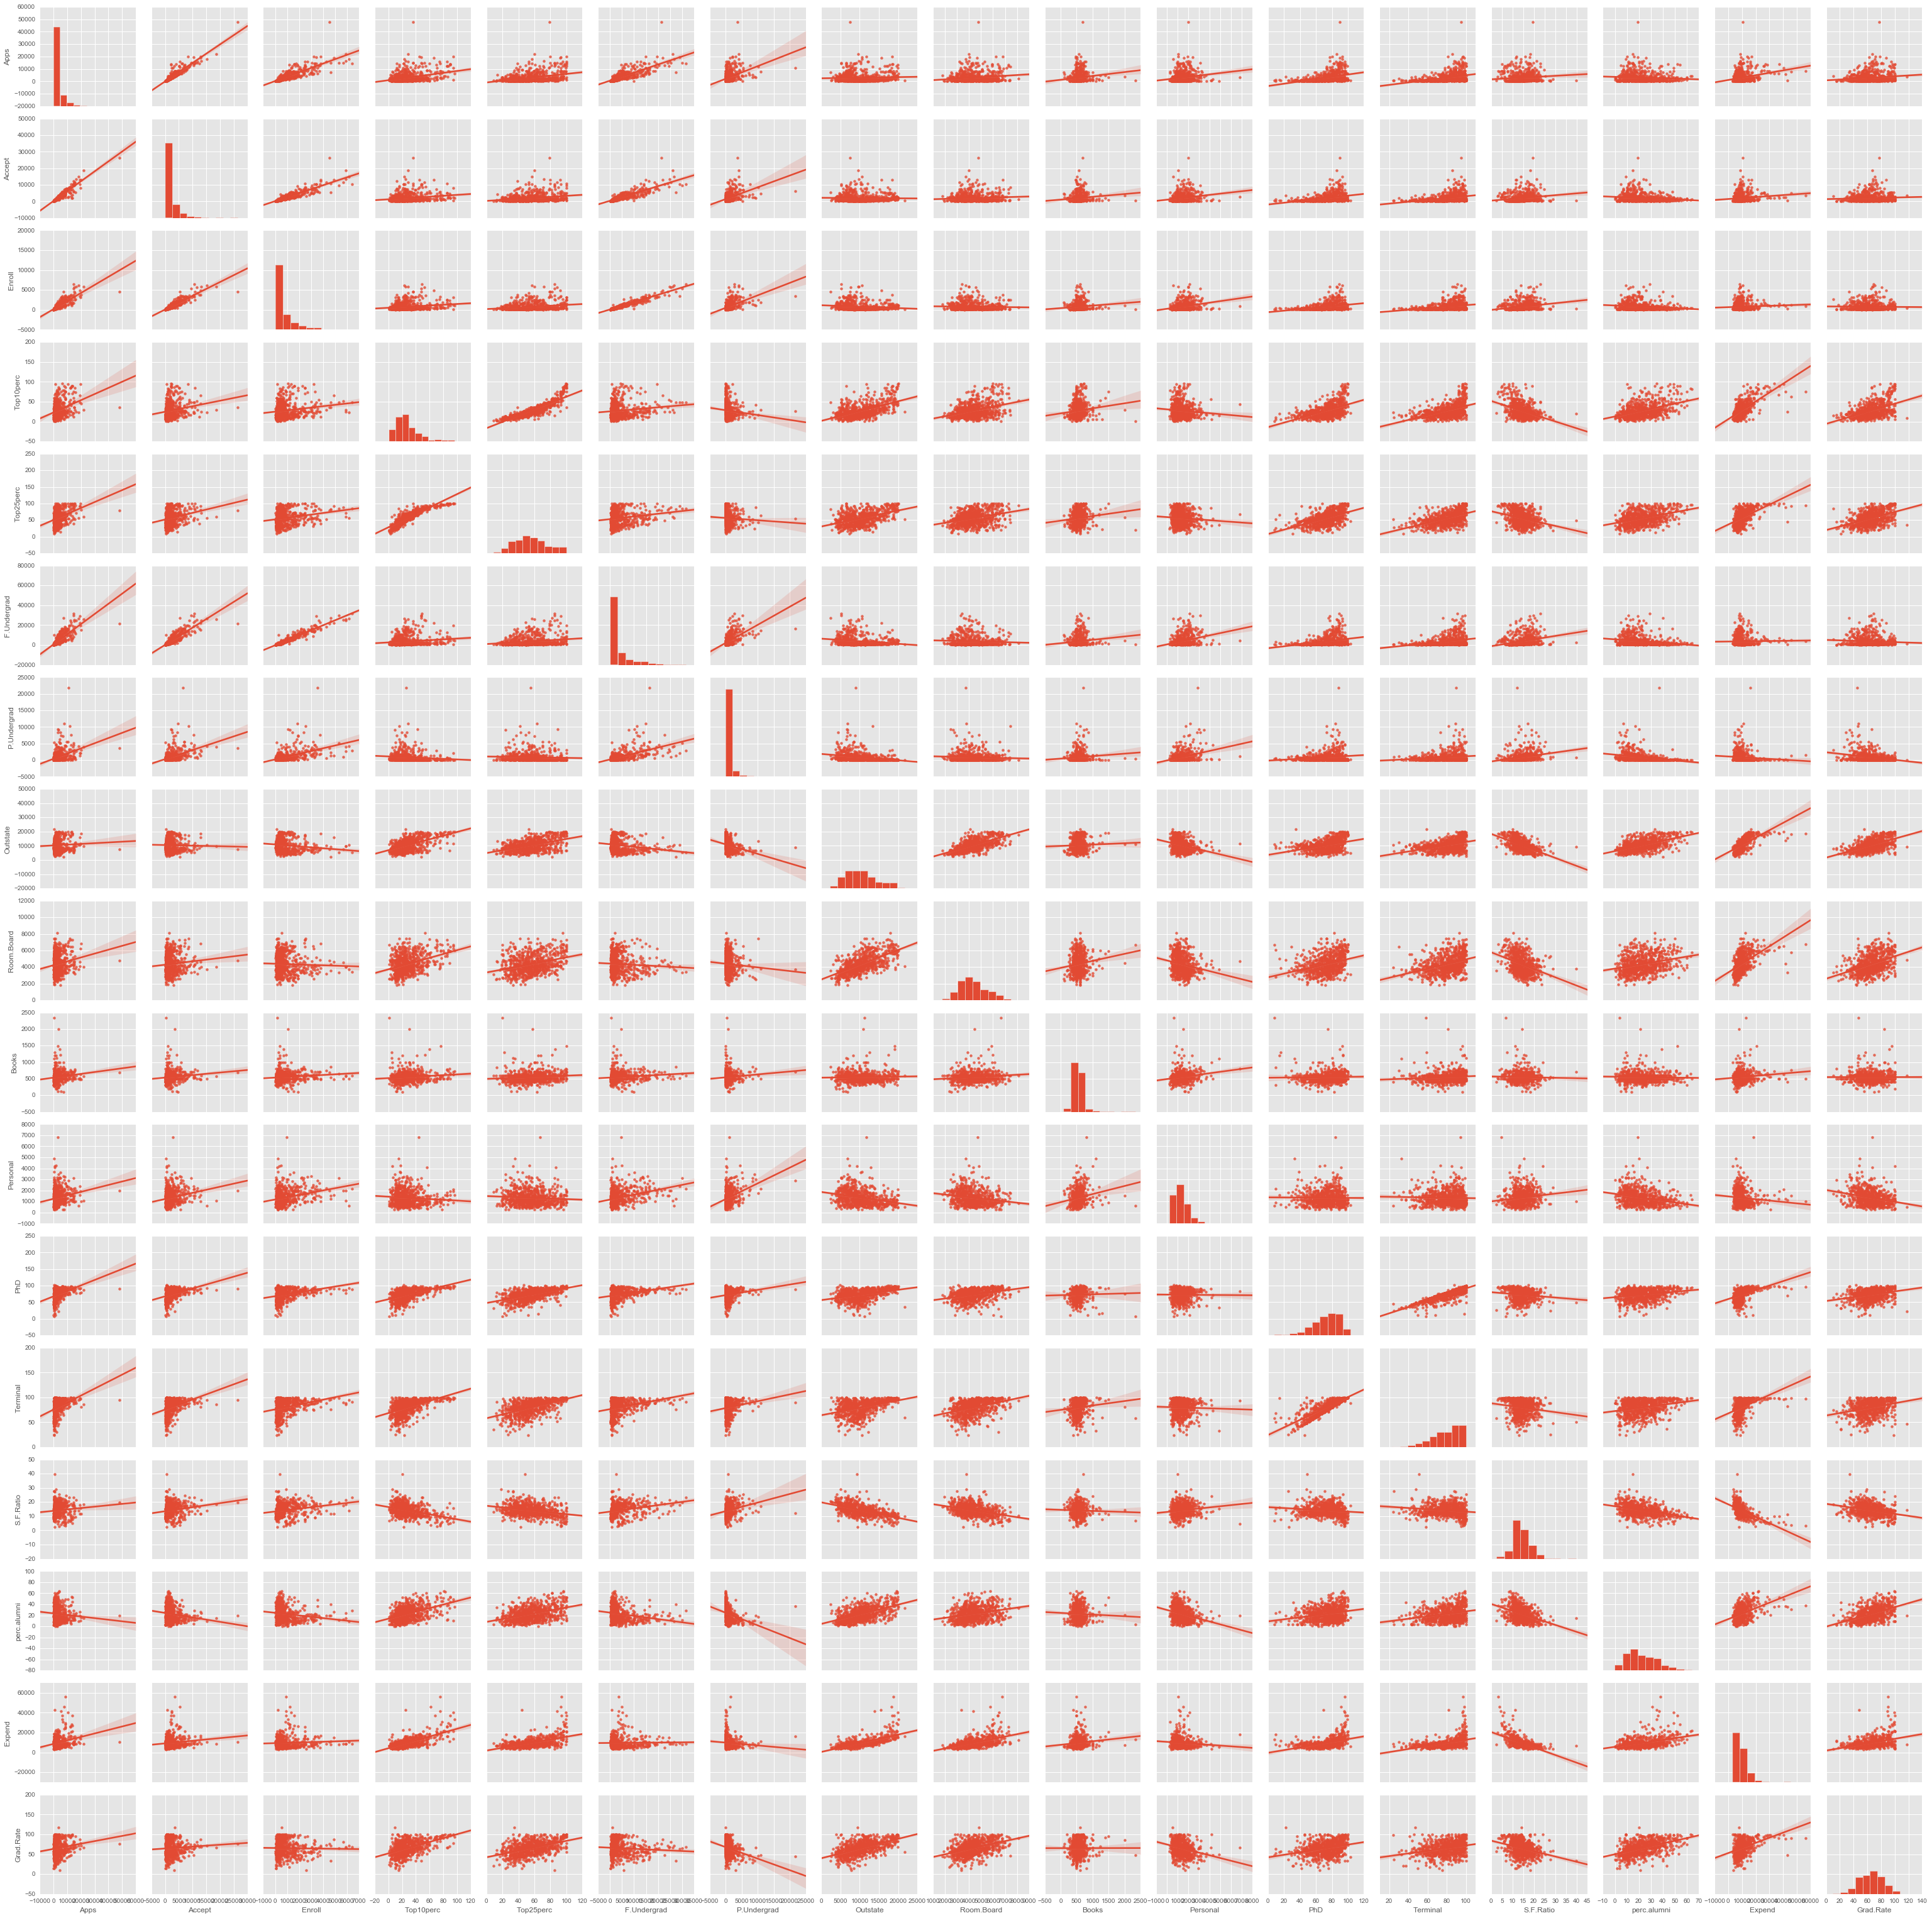

In [8]:
sns.pairplot(data = df,kind = 'reg')

#### Observations:
- The reg plot suggests that the 'outstate' and 'Perc Alumni' is essentially flat,meaning that there is hardly a relationship between these variables and the response.

In [34]:
#train,test split
train_X,test_X,train_y,test_y = cross_validation.train_test_split(X,y,test_size=.2)

In [35]:
train_X.head()


,Private,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
254,1,745,347,35,66,1133,42,11090,4700,400,750,80,80,12.0,31,12639,79
304,1,538,224,15,35,840,325,5170,3430,600,1590,61,61,16.1,10,5531,60
207,0,1655,819,13,38,3224,436,5840,3138,400,2430,76,76,19.1,8,5039,43
151,1,1329,383,33,68,1140,10,15248,4323,550,800,71,76,12.2,31,10340,64
358,1,293,93,11,32,336,80,7950,3750,600,2740,54,54,9.8,45,9754,48


In [38]:
# Linear Model without Regularization
model_linear = linear_model.LinearRegression().fit(train_X,train_y)
model_linear.score(train_X,train_y)


0.92913426132096866

In [41]:
model_linear.score(test_X,test_y)
y_hat_test = model_linear.predict(test_X)
y_hat_train = model_linear.predict(train_X)


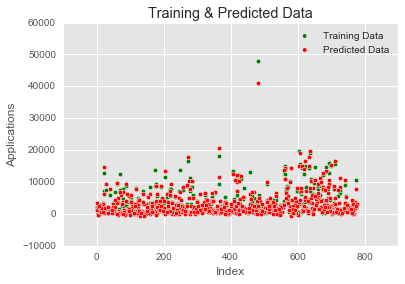

In [47]:
plt.scatter(x = train_X.index,y=train_y,c='g',label = 'Training Data')
plt.scatter(x = train_X.index,y=y_hat_train,c='r',label='Predicted Data')
plt.xlabel('Index')
plt.ylabel('Applications')
plt.title('Training & Predicted Data')
plt.legend(loc='best')

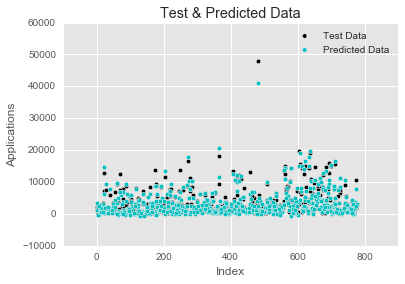

In [49]:
plt.scatter(x = train_X.index,y=train_y,c='k',label = 'Test Data')
plt.scatter(x = train_X.index,y=y_hat_train,c='c',label='Predicted Data')
plt.xlabel('Index')
plt.ylabel('Applications')
plt.title('Test & Predicted Data')
plt.legend(loc='best')

### Observations:
- The training R_2 is ~ 93% 
- Testing R_2 is ~ 92%

### ***************** Regularization*****************

In [68]:
df_coeff = pd.DataFrame(index=[0])


In [69]:
df_coeff

""
0


In [83]:
# Creating a regularization parameter

alphas = np.linspace(5,-2)**10
#creating a Data frame to hold the values of calculated score
df_eval = pd.DataFrame({'alphas':np.nan,'train_score':np.nan,'cv_score':np.nan},index=[0])
df_coeff = pd.DataFrame({'alpha':np.nan},index=[0])

for i in range(0,len(alphas)):
    model_ridge = linear_model.Ridge(alpha = alphas[i],normalize=True,solver='lsqr').fit(train_X,train_y)
    train_score = model_ridge.score(train_X,train_y)
    cv_score = cross_validation.cross_val_score(model_ridge,train_X,train_y,cv=10).mean()
    #extracting the coefficients
    coeff = model_ridge.coef_
    #the for loop would populate the coeficients Data frame
    for j in range(0,len(train_X.columns)):
          
        df_coeff.loc[i,train_X.columns[j]] = coeff[j]
    
    #populating the other Data Frame
    df_eval.loc[i ,'train_score'] = train_score
    df_eval.loc[i ,'cv_score'] = cv_score
    df_eval.loc[i ,'alphas'] = alphas[i]
    df_coeff.loc[i,'alpha'] = alphas[i]
    

    

In [84]:
df_coeff.head(5)

,alpha,Private,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,9.765625e+06,-0.000393,1.538365e-07,3.542657e-07,0.000008,0.000007,6.531711e-08,9.600719e-08,3.484084e-09,6.069495e-08,3.453581e-07,1.172127e-07,0.000010,0.000011,0.000010,-0.000003,2.074691e-08,0.000004
1,7.308172e+06,-0.000525,2.055656e-07,4.733914e-07,0.000011,0.000010,8.728069e-08,1.282906e-07,4.655645e-09,8.110427e-08,4.614885e-07,1.566267e-07,0.000013,0.000014,0.000013,-0.000004,2.772328e-08,0.000005
2,5.421994e+06,-0.000708,2.770768e-07,6.380725e-07,0.000014,0.000013,1.176435e-07,1.729198e-07,6.275228e-09,1.093184e-07,6.220289e-07,2.111133e-07,0.000018,0.000019,0.000017,-0.000006,3.736753e-08,0.000006
3,3.985836e+06,-0.000963,3.769118e-07,8.679796e-07,0.000019,0.000018,1.600322e-07,2.352254e-07,8.536288e-09,1.487075e-07,8.461552e-07,2.871806e-07,0.000025,0.000026,0.000023,-0.000008,5.083161e-08,0.000009
4,2.901593e+06,-0.001323,5.177527e-07,1.192318e-06,0.000027,0.000024,2.198315e-07,3.231222e-07,1.172605e-08,2.042752e-07,1.162339e-06,3.944916e-07,0.000034,0.000036,0.000032,-0.000011,6.982590e-08,0.000012


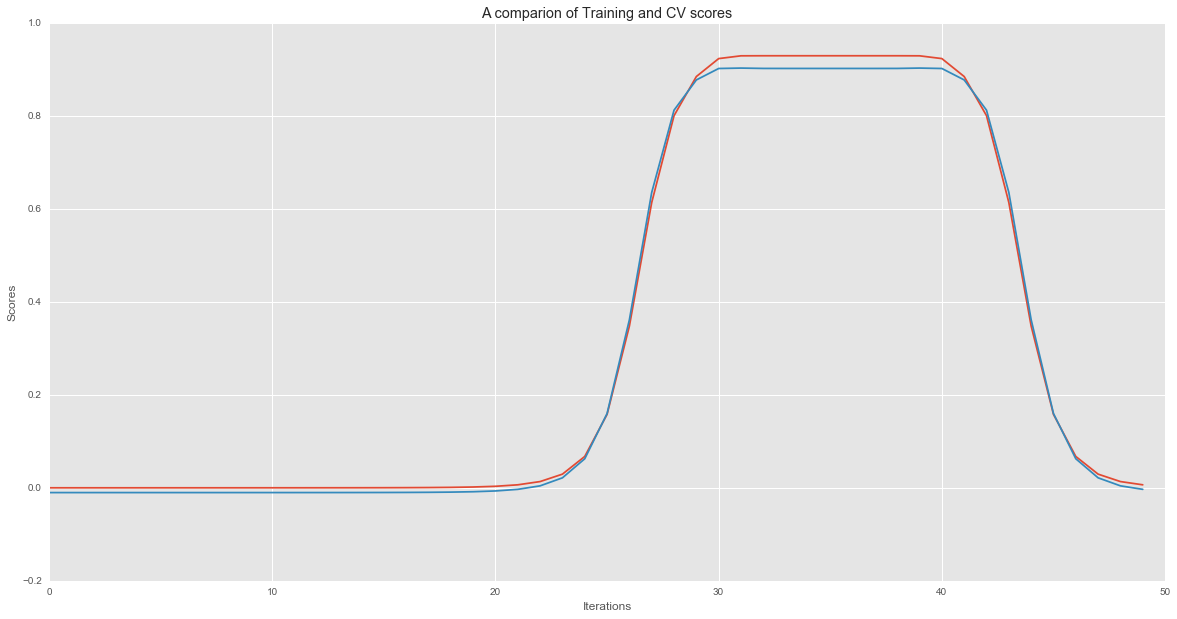

In [114]:
plt.figure(figsize=(20,10))
plt.plot(df_eval.index,df_eval.train_score,label='Training score')
plt.plot(df_eval.index,df_eval.cv_score,label='CV score')
plt.xlabel('Iterations')
plt.ylabel('Scores')
plt.title('A comparion of Training and CV scores')

In [63]:
df_eval[(df_eval.cv_score==df_eval.cv_score.max())]

,alphas,cv_score,train_score
39,0.003712,0.902624,0.928991


In [94]:
df_coeff.ix[39]

alpha            0.003712
Private       -541.224873
Accept           1.588890
Enroll          -0.581293
Top10perc       51.126906
Top25perc      -14.910269
F.Undergrad     -0.006127
P.Undergrad      0.068777
Outstate        -0.091055
Room.Board       0.117176
Books            0.022074
Personal         0.003470
PhD            -10.026080
Terminal        -2.716280
S.F.Ratio       16.776769
perc.alumni      1.789645
Expend           0.084090
Grad.Rate        8.878866
Name: 39, dtype: float64

#### PLots for coefficients

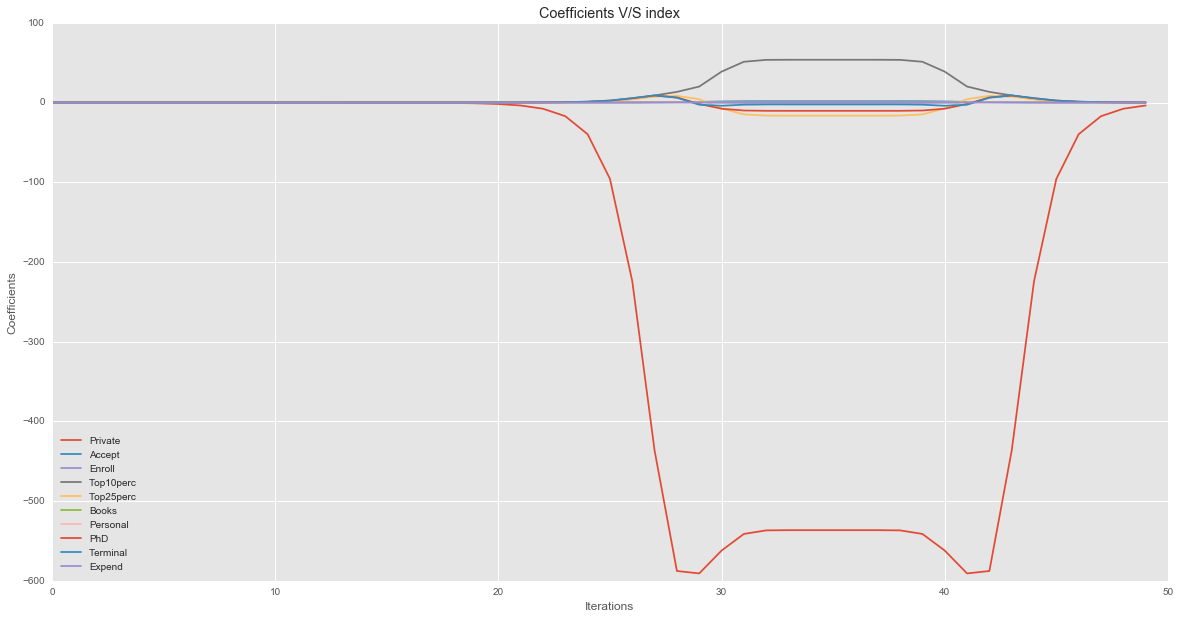

In [111]:
plt.figure(figsize=(20,10))
plt.plot(df_coeff.index,df_coeff.Private,label='Private')
plt.plot(df_coeff.index,df_coeff.Accept,label='Accept')
plt.plot(df_coeff.index,df_coeff.Enroll,label='Enroll')
plt.plot(df_coeff.index,df_coeff.Top10perc,label='Top10perc')
plt.plot(df_coeff.index,df_coeff.Top25perc,label='Top25perc')
#plt.plot(df_coeff.index,df_coeff.F.Undergrad,label='F.Undergrad')
#plt.plot(df_coeff.index,df_coeff.P.Undergrad,label='P.Undergrad')
#plt.plot(df_coeff.index,df_coeff.Outstate,label='Outstate')
#plt.plot(df_coeff.index,df_coeff.Room.Board,label='Room.Board')
plt.plot(df_coeff.index,df_coeff.Books,label='Books')
plt.plot(df_coeff.index,df_coeff.Personal,label='Personal')
plt.plot(df_coeff.index,df_coeff.PhD,label='PhD')
plt.plot(df_coeff.index,df_coeff.Terminal,label='Terminal')
#plt.plot(df_coeff.index,df_coeff.S.F.Ratio,label='S.F.Ratio')
#plt.plot(df_coeff.index,df_coeff.perc.alumni,label='perc.alumni')
plt.plot(df_coeff.index,df_coeff.Expend,label='Expend')
#plt.plot(df_coeff.index,df_coeff.Grad.Rate,label='Grad.Rate')
#plt.xlim([30,40])
#plt.ylim([-1,1])
plt.legend(loc='best')
plt.xlabel('Iterations')
plt.ylabel('Coefficients')
plt.title('Coefficients V/S index')

plt.show()


####  Findings:
- As expected the coefficients for the ridge regressions are close to 0 , but not exactly 0
- The best scores based from Cross validation is when 'Lambda' is 0.003712

### *********** Predictions with the best value of regularization parameter ***********

In [128]:
model_ridge = linear_model.Ridge(alpha=0.003712,normalize =True,solver='lsqr').fit(train_X,train_y)
train_y_hat = model_ridge.predict(train_X)
test_y_hat = model_ridge.predict(test_X)
print "The Test set R_2 is %r " %model_ridge.score(test_X,test_y)


The Test set R_2 is 0.92451670006197162 


### Plots of the Data Set based on the predictions from Lasso

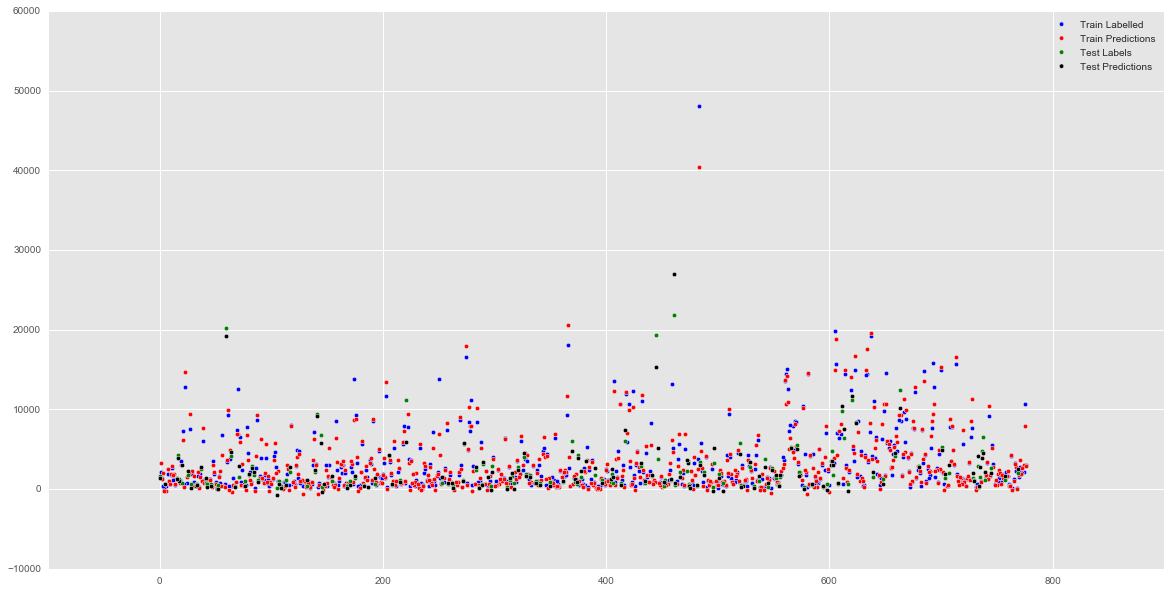

In [125]:
plt.figure(figsize=(20,10))
plt.scatter(x = train_X.index,y=train_y,c='b',label='Train Labelled')
plt.scatter(x = train_X.index,y=train_y_hat,c='r',label='Train Predictions')
plt.scatter(x = test_X.index,y=test_y,c='g',label='Test Labels')
plt.scatter(x = test_X.index,y=test_y_hat,c='k',label='Test Predictions')
plt.legend(loc='best')

### ************** Lasso**************

In [132]:
#creating a Data frame to hold the values of calculated score
alphas = np.linspace(5,-2,100)**10
df_eval_lasso = pd.DataFrame({'alphas':np.nan,'train_score':np.nan,'cv_score':np.nan},index=[0])
df_coeff_lasso = pd.DataFrame({'alpha':np.nan},index=[0])

for i in range(0,len(alphas)):
    model_lasso = linear_model.Lasso(alpha = alphas[i],normalize=True,max_iter=100000).fit(train_X,train_y)
    train_score = model_lasso.score(train_X,train_y)
    cv_score = cross_validation.cross_val_score(model_lasso,train_X,train_y,cv=10).mean()
    #extracting the coefficients
    coeff = model_lasso.coef_
    #the for loop would populate the coeficients Data frame
    for j in range(0,len(train_X.columns)):
          
        df_coeff_lasso.loc[i,train_X.columns[j]] = coeff[j]
    
    #populating the other Data Frame
    df_eval_lasso.loc[i ,'train_score'] = train_score
    df_eval_lasso.loc[i ,'cv_score'] = cv_score
    df_eval_lasso.loc[i ,'alphas'] = alphas[i]
    df_eval_lasso.loc[i,'alpha'] = alphas[i]

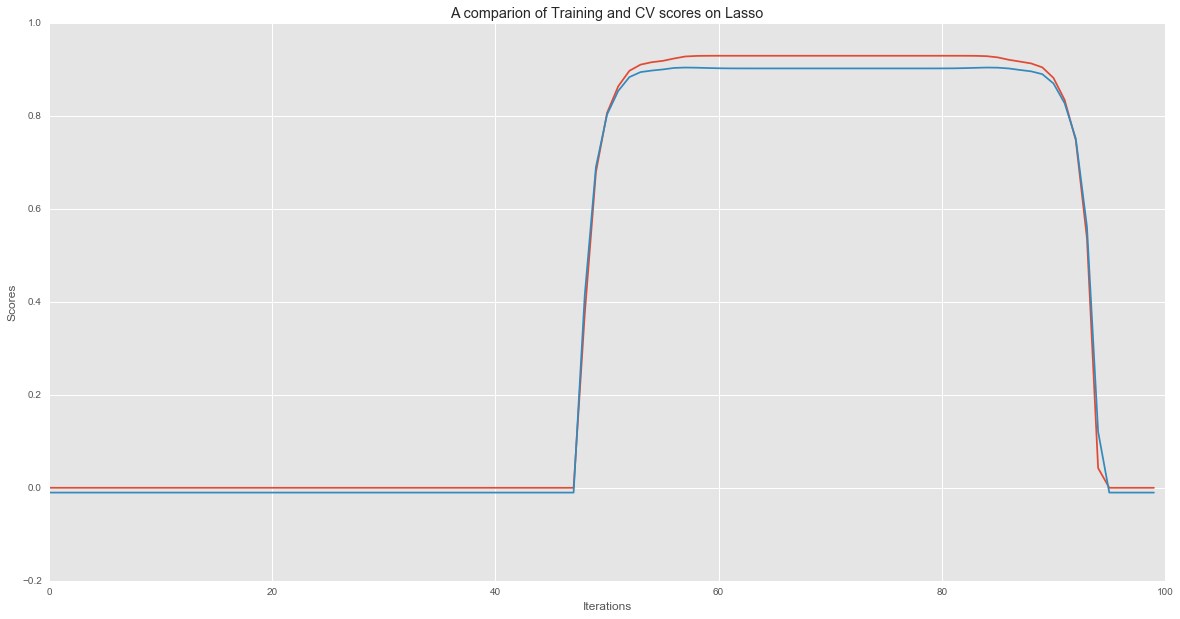

In [134]:
plt.figure(figsize=(20,10))
plt.plot(df_eval_lasso.index,df_eval_lasso.train_score,label='Training score')
plt.plot(df_eval_lasso.index,df_eval_lasso.cv_score,label='CV score')
plt.xlabel('Iterations')
plt.ylabel('Scores')
plt.title('A comparion of Training and CV scores on Lasso')

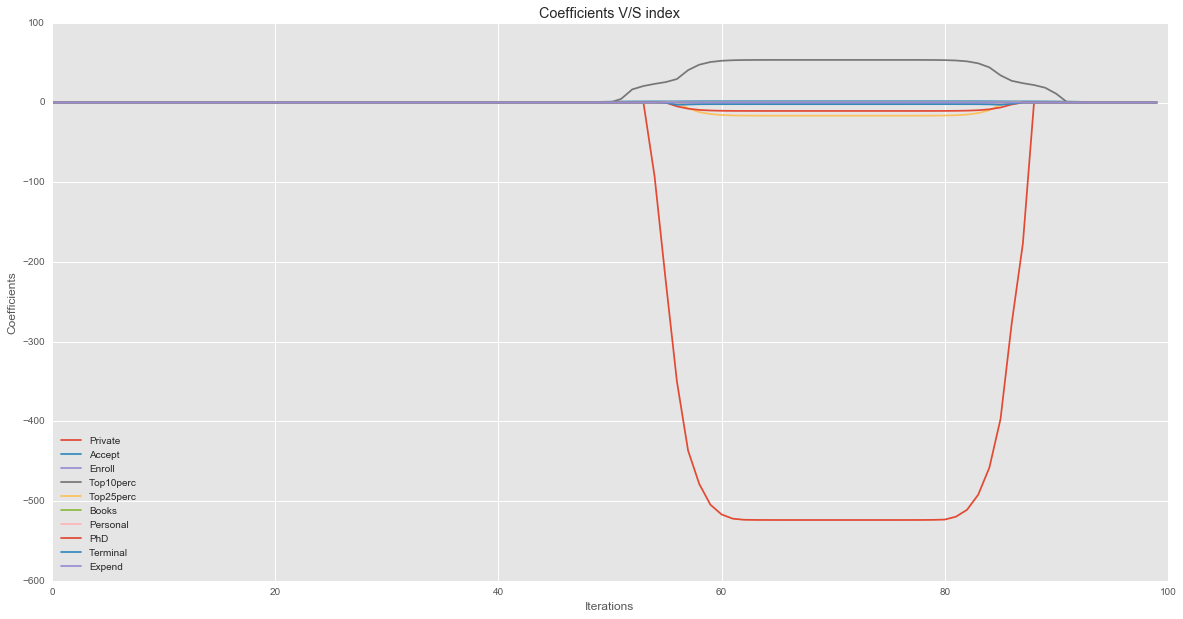

In [135]:
plt.figure(figsize=(20,10))
plt.plot(df_coeff_lasso.index,df_coeff_lasso.Private,label='Private')
plt.plot(df_coeff_lasso.index,df_coeff_lasso.Accept,label='Accept')
plt.plot(df_coeff_lasso.index,df_coeff_lasso.Enroll,label='Enroll')
plt.plot(df_coeff_lasso.index,df_coeff_lasso.Top10perc,label='Top10perc')
plt.plot(df_coeff_lasso.index,df_coeff_lasso.Top25perc,label='Top25perc')
#plt.plot(df_coeff.index,df_coeff.F.Undergrad,label='F.Undergrad')
#plt.plot(df_coeff.index,df_coeff.P.Undergrad,label='P.Undergrad')
#plt.plot(df_coeff.index,df_coeff.Outstate,label='Outstate')
#plt.plot(df_coeff.index,df_coeff.Room.Board,label='Room.Board')
plt.plot(df_coeff_lasso.index,df_coeff_lasso.Books,label='Books')
plt.plot(df_coeff_lasso.index,df_coeff_lasso.Personal,label='Personal')
plt.plot(df_coeff_lasso.index,df_coeff_lasso.PhD,label='PhD')
plt.plot(df_coeff_lasso.index,df_coeff_lasso.Terminal,label='Terminal')
#plt.plot(df_coeff.index,df_coeff.S.F.Ratio,label='S.F.Ratio')
#plt.plot(df_coeff.index,df_coeff.perc.alumni,label='perc.alumni')
plt.plot(df_coeff_lasso.index,df_coeff_lasso.Expend,label='Expend')
#plt.plot(df_coeff.index,df_coeff.Grad.Rate,label='Grad.Rate')
#plt.xlim([30,40])
#plt.ylim([-1,1])
plt.legend(loc='best')
plt.xlabel('Iterations')
plt.ylabel('Coefficients')
plt.title('Coefficients V/S index')

plt.show()

In [136]:
df_eval_lasso[(df_eval_lasso.cv_score==df_eval_lasso.cv_score.max())]

,alphas,cv_score,train_score,alpha
84,0.535152,0.903793,0.928275,0.535152


In [138]:
df_coeff_lasso.ix[84]

alpha                 NaN
Private       -457.918739
Accept           1.558960
Enroll          -0.488086
Top10perc       44.078904
Top25perc       -9.638568
F.Undergrad     -0.000000
P.Undergrad      0.047632
Outstate        -0.078020
Room.Board       0.092881
Books            0.000000
Personal        -0.000000
PhD             -8.520562
Terminal        -2.322915
S.F.Ratio        9.810799
perc.alumni      0.000000
Expend           0.079909
Grad.Rate        7.148348
Name: 84, dtype: float64

### Observations
- As expected Lasso has reduced the coefficients estimates to Zero

### ********** Predictions on Lasso Model*************

In [140]:
model_lasso = linear_model.Lasso(alpha=0.535152,normalize =True).fit(train_X,train_y)
train_y_hat_lasso = model_lasso.predict(train_X)
test_y_hat_lasso = model_lasso.predict(test_X)
print "The Test set R_2 is %r " %model_lasso.score(test_X,test_y)

The Test set R_2 is 0.92685230851019895 


### PLots on Lasso Prediction

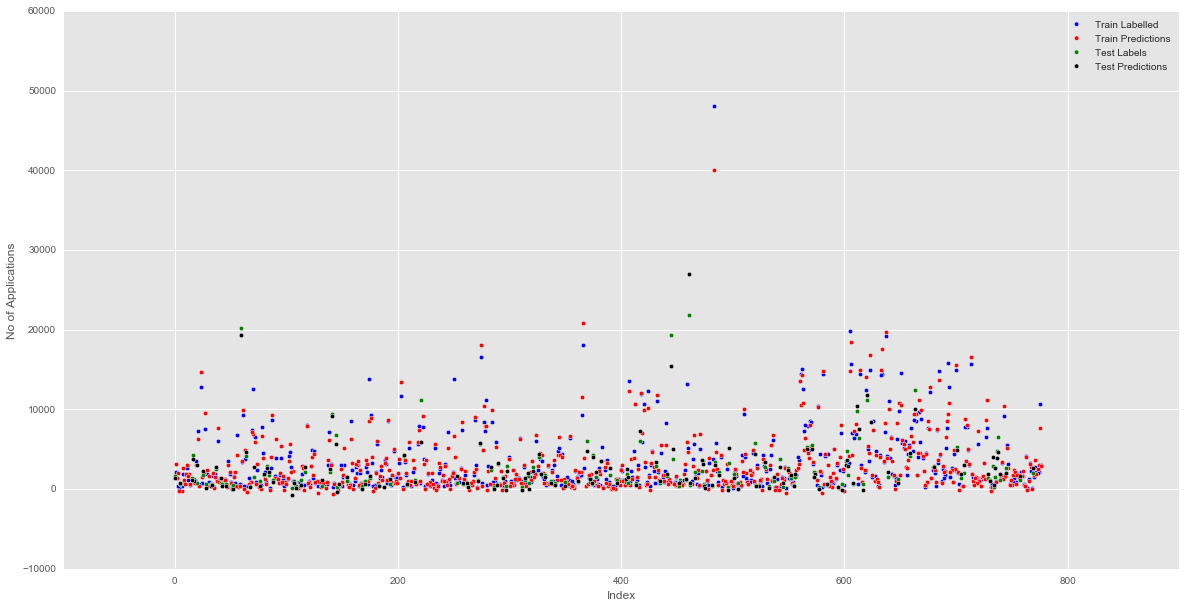

In [143]:
plt.figure(figsize=(20,10))
plt.scatter(x = train_X.index,y=train_y,c='b',label='Train Labelled')
plt.scatter(x = train_X.index,y=train_y_hat_lasso,c='r',label='Train Predictions')
plt.scatter(x = test_X.index,y=test_y,c='g',label='Test Labels')
plt.scatter(x = test_X.index,y=test_y_hat_lasso,c='k',label='Test Predictions')
plt.legend(loc='best')
plt.xlabel('Index')
plt.ylabel('No of Applications')

## Conclusion:
- Ridge regression seems to be the Best amongst all the Models as it gives the best R_2 on the training Data 